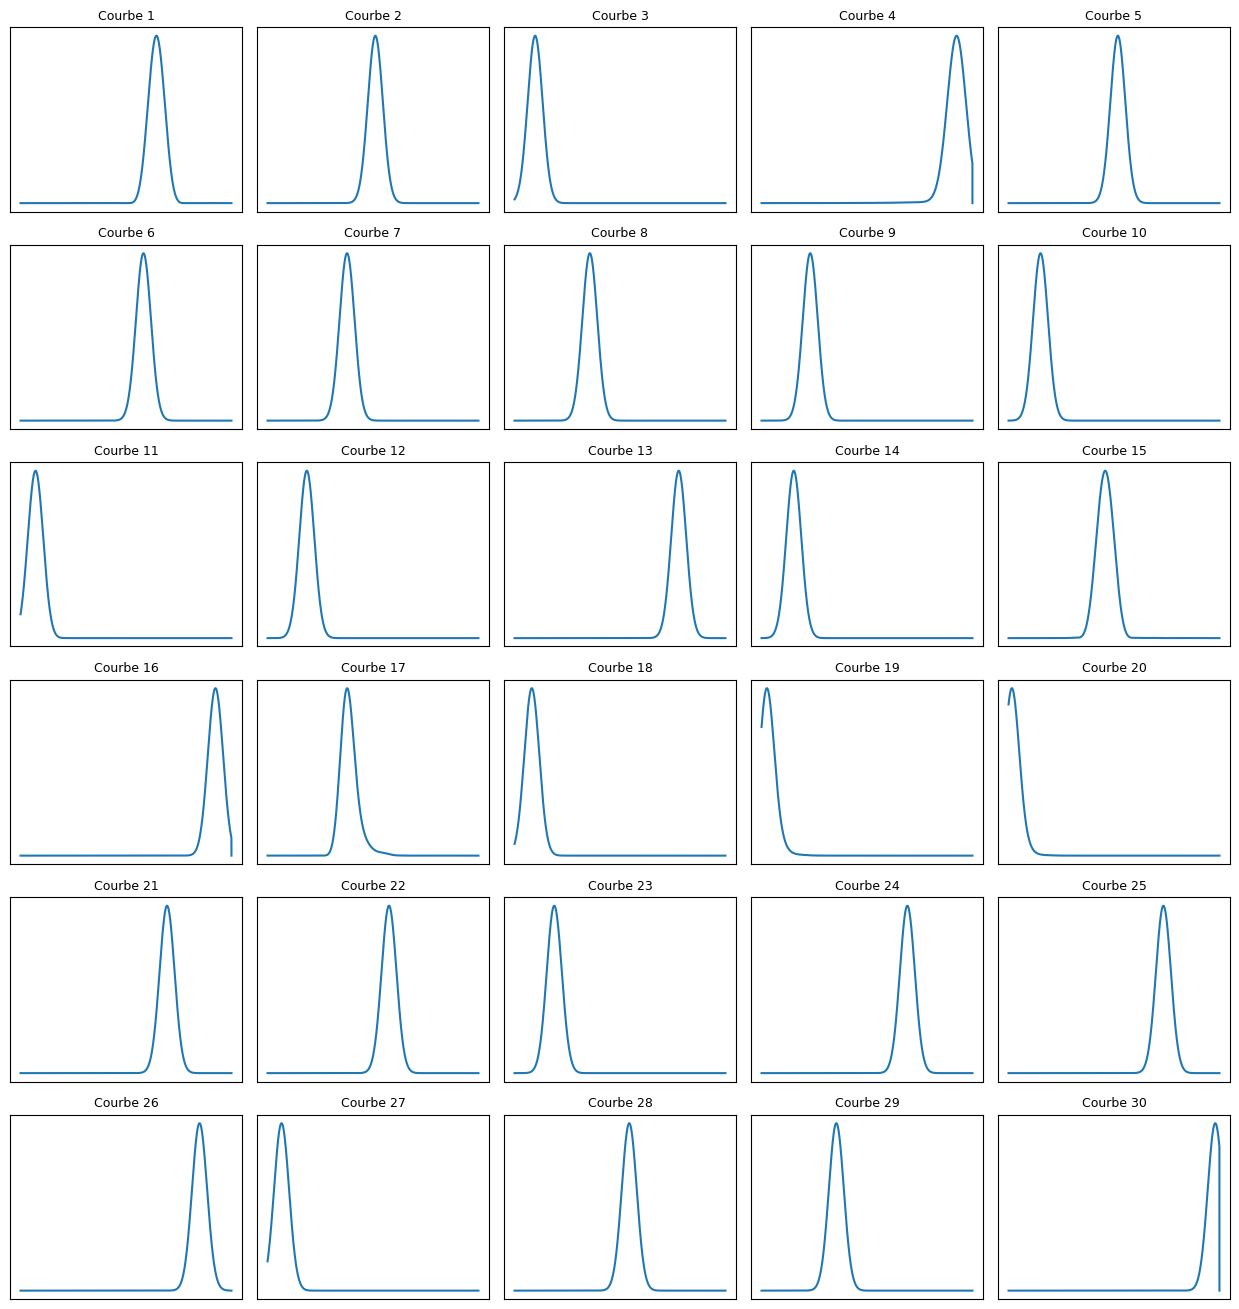

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données
X_data = np.load('data/X_data_array_5000.npy')
y_data = np.load('data/y_data_array_5000.npy')

# Réduction de Y : on prend 1 point sur 10 (axis=1)
#y_data = y_data[:, ::10]  # (n, 500)

# Affichage des 30 premières courbes, une par subplot
n_examples = 30
n_cols = 5
n_rows = 6

plt.figure(figsize=(2.5*n_cols, 2.2*n_rows))
for i in range(n_examples):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(np.arange(1, 5001), y_data[i])
    plt.title(f"Courbe {i+1}", fontsize=9)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


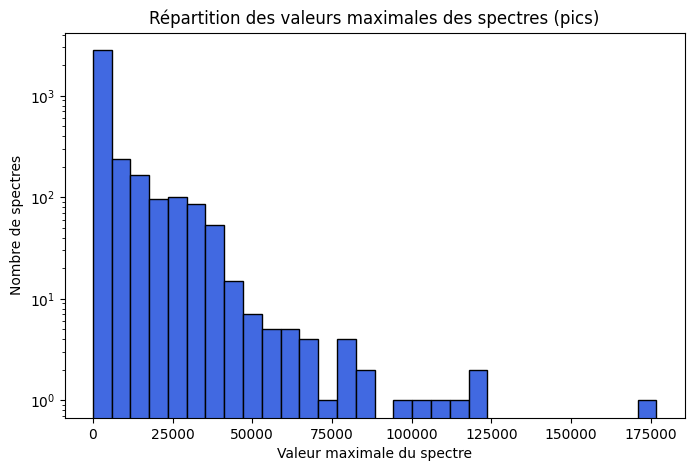

In [6]:
# Calcul des valeurs maximales pour chaque spectre
max_values = np.max(y_data, axis=1)

# Affichage de l'histogramme des valeurs maximales
plt.figure(figsize=(8, 5))
plt.hist(max_values, bins=30, color='royalblue', edgecolor='black')
plt.yscale('log')
plt.xlabel("Valeur maximale du spectre")
plt.ylabel("Nombre de spectres")
plt.title("Répartition des valeurs maximales des spectres (pics)")
plt.show()

In [8]:
print("Min:", np.min(max_values))
print("Max:", np.max(max_values))
print("Moyenne:", np.mean(max_values))
print("Médiane:", np.median(max_values))

Min: 0.010001136
Max: 176696.14
Moyenne: 5312.8936
Médiane: 324.75403


# ----------------------------------------------------------------------------------------------------------------------------------------

In [9]:
import pandas as pd

dataset = pd.read_csv('C:\\Users\\gabriel.legros\\Documents\\VSCode\\Github\\C2N\\VAE_v2\\data\\NN_training_combine_new.csv')
print("Shape :", dataset.shape)
print("Colonnes :", dataset.columns.tolist())
print(dataset.head(20))
print(dataset.describe())

Shape : (9801, 16)
Colonnes : ['w', 'DC', 'pitch', 'k', 'E_5000', 'E_500', 'E_50', 'nombre_de_pics_5000', 'peak0_5000', 'peak1_5000', 'nombre_de_pics_500', 'peak0_500', 'peak1_500', 'nombre_de_pics_50', 'peak0_50', 'peak1_50']
        w    DC  pitch             k  \
0   568.0  0.79  443.0  4.396811e+06   
1   569.0  0.38  593.0  4.873972e+06   
2   568.0  0.63  494.0  4.578839e+06   
3   568.0  0.63  291.0  6.477511e+06   
4   568.0  0.34  566.0  3.996372e+06   
5   568.0  0.59  485.0  5.311559e+06   
6   568.0  0.45  333.0  7.358685e+06   
7   567.0  0.79  471.0  4.669034e+06   
8   568.0  0.25  412.0  6.252684e+06   
9   567.0  0.66  277.0  7.485383e+06   
10  567.0  0.51  552.0  5.349814e+06   
11  567.0  0.40  464.0  5.958193e+06   
12  566.0  0.38  388.0  6.477511e+06   
13  566.0  0.26  298.0  5.692819e+06   
14  564.0  0.78  482.0  5.474975e+06   
15  565.0  0.77  591.0  3.189434e+06   
16  565.0  0.60  566.0  4.329403e+06   
17  565.0  0.56  329.0  9.166957e+06   
18  564.0  0.

In [14]:
# Affichage du min et max pour les 4 premières colonnes
for col in ['w', 'DC', 'pitch', 'k']:
    min_val = dataset[col].min()
    max_val = dataset[col].max()
    print(f"{col} : min = {min_val}, max = {max_val}")

w : min = 200.0, max = 600.0
DC : min = 0.1, max = 0.9
pitch : min = 100.0, max = 600.0
k : min = 1570796.326794896, max = 31415926.53589793


In [26]:
# Filtrer les lignes où nombre_de_pics_5000 == 2
filtered = dataset[dataset['nombre_de_pics_5000'] == 2]

# Affichage du min, max et médiane pour les 4 premières colonnes sur ce sous-ensemble
for col in ['w', 'DC', 'pitch', 'k']:
    min_val = filtered[col].min()
    max_val = filtered[col].max()
    median_val = filtered[col].median()
    print(f"{col} (2 pics) : min = {min_val}, max = {max_val}, médiane = {median_val}")

w (2 pics) : min = 200.0, max = 600.0, médiane = 450.0
DC (2 pics) : min = 0.1, max = 0.9, médiane = 0.5
pitch (2 pics) : min = 200.0, max = 600.0, médiane = 475.0
k (2 pics) : min = 3801591.110226304, max = 10471975.51196598, médiane = 6041524.333826525


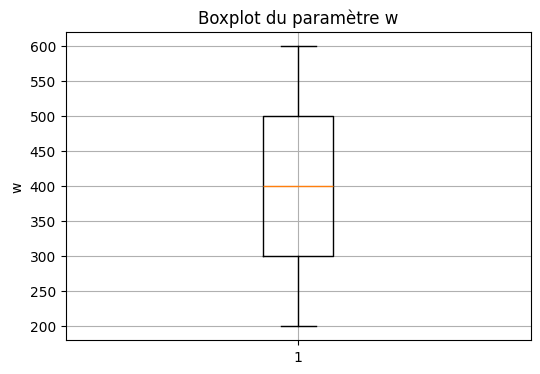

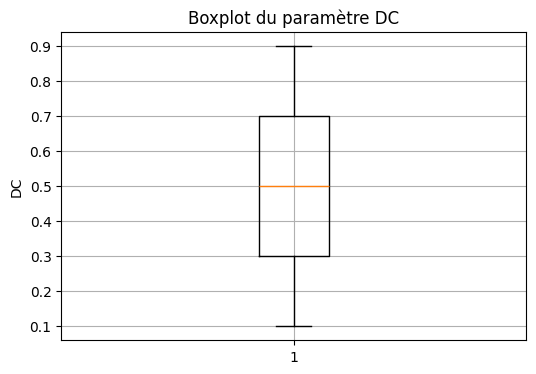

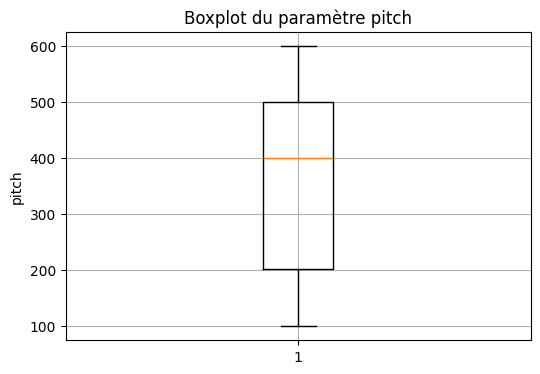

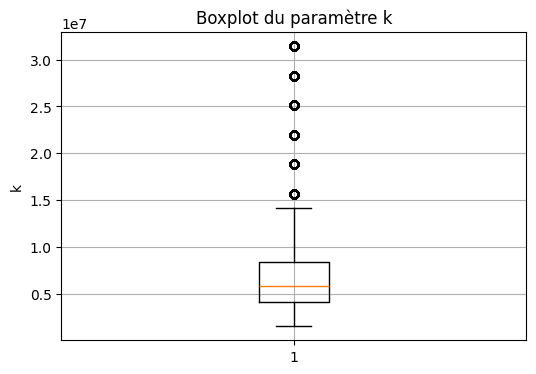

In [23]:
import matplotlib.pyplot as plt

# Boxplots séparés pour chaque paramètre
for col in ['w', 'DC', 'pitch', 'k']:
    plt.figure(figsize=(6, 4))
    plt.boxplot(dataset[col])
    plt.title(f"Boxplot du paramètre {col}")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\3820287025.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


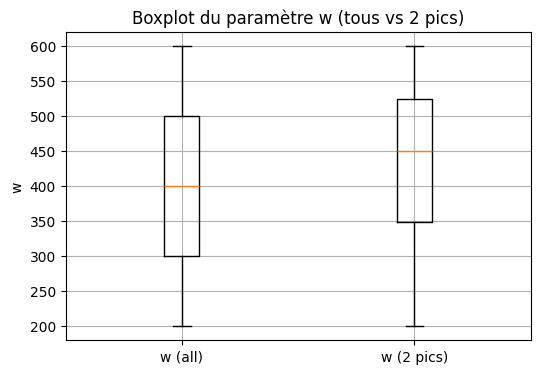

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\3820287025.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


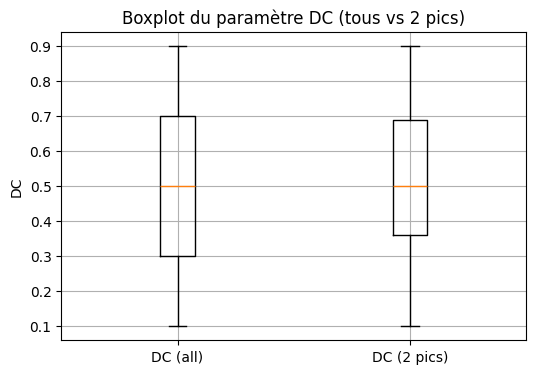

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\3820287025.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


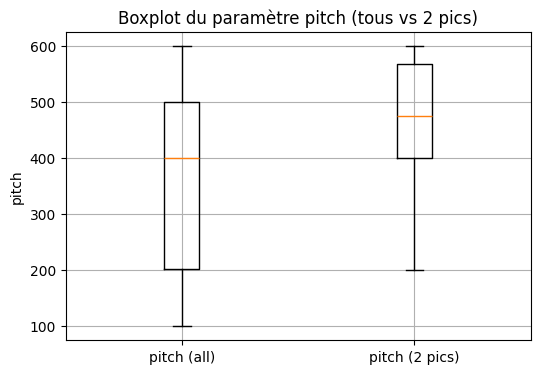

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\3820287025.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


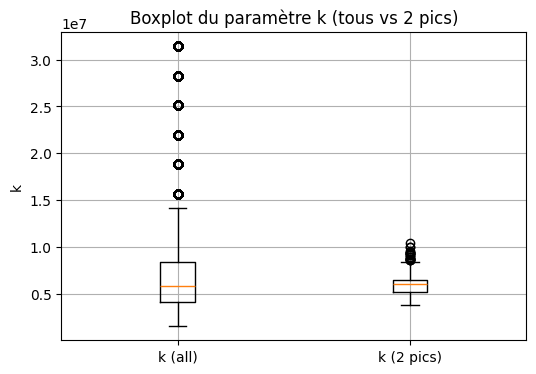

In [24]:
# Boxplots comparant toutes les valeurs et celles à 2 pics pour chaque paramètre
filtered = dataset[dataset['nombre_de_pics_5000'] == 2]

for col in ['w', 'DC', 'pitch', 'k']:
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        [dataset[col], filtered[col]],
        labels=[f"{col} (all)", f"{col} (2 pics)"]
    )
    plt.title(f"Boxplot du paramètre {col} (tous vs 2 pics)")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\1483399661.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


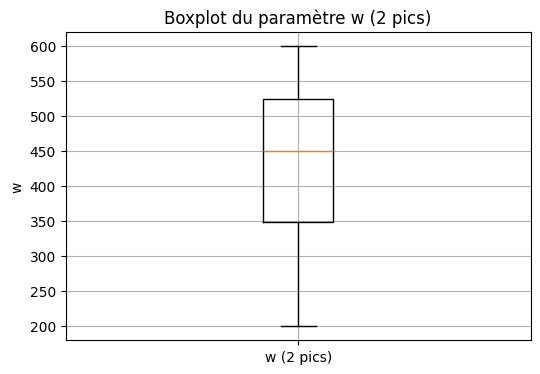

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\1483399661.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


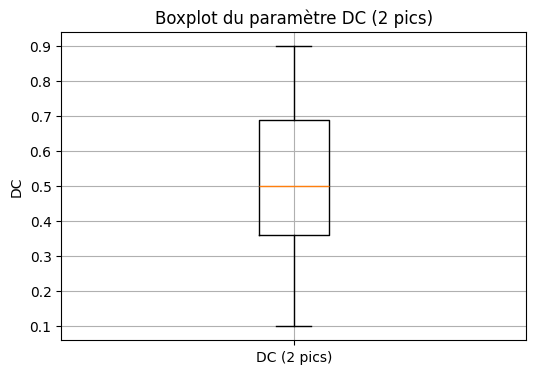

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\1483399661.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


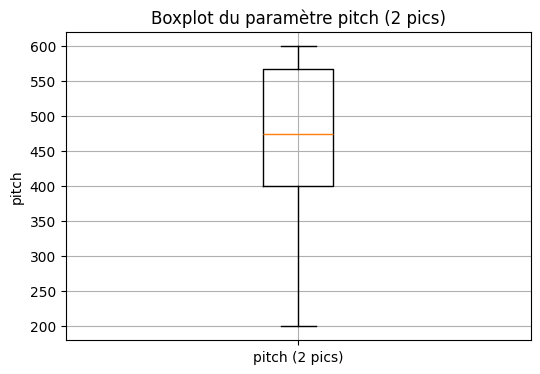

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\1483399661.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


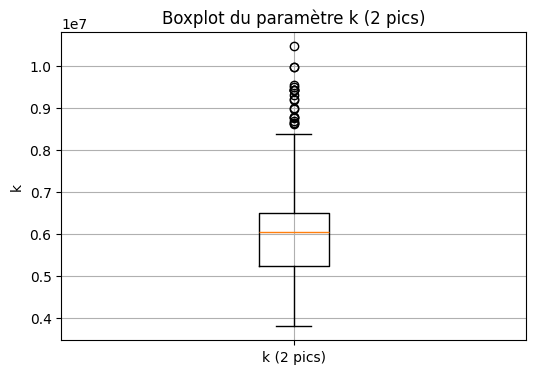

In [27]:
# Boxplots comparant toutes les valeurs et celles à 2 pics pour chaque paramètre
filtered = dataset[dataset['nombre_de_pics_5000'] == 2]

for col in ['w', 'DC', 'pitch', 'k']:
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        [filtered[col]],
        labels=[f"{col} (2 pics)"]
    )
    plt.title(f"Boxplot du paramètre {col} (2 pics)")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\2938876664.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data], labels=[f"{col} (2 pics)"])


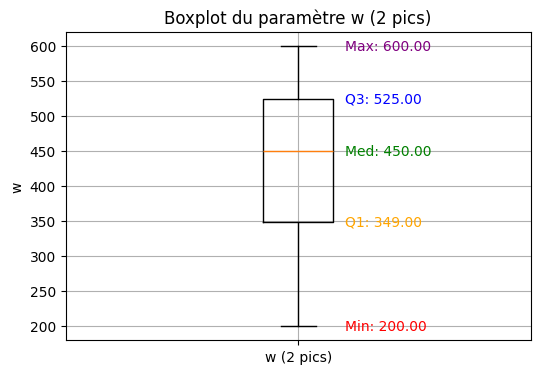

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\2938876664.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data], labels=[f"{col} (2 pics)"])


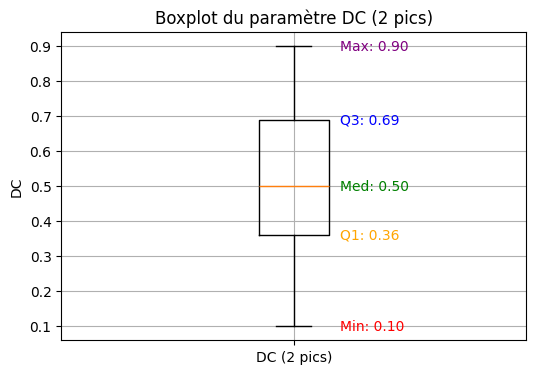

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\2938876664.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data], labels=[f"{col} (2 pics)"])


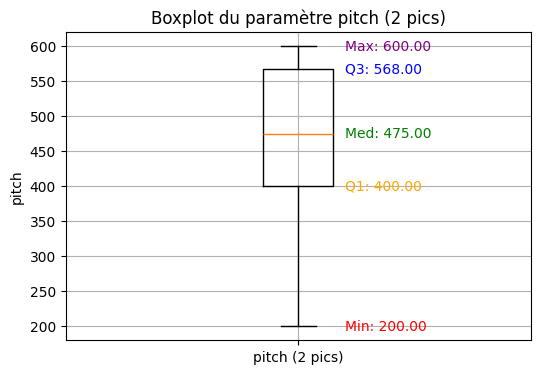

C:\Users\gabriel.legros\AppData\Local\Temp\ipykernel_8808\2938876664.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data], labels=[f"{col} (2 pics)"])


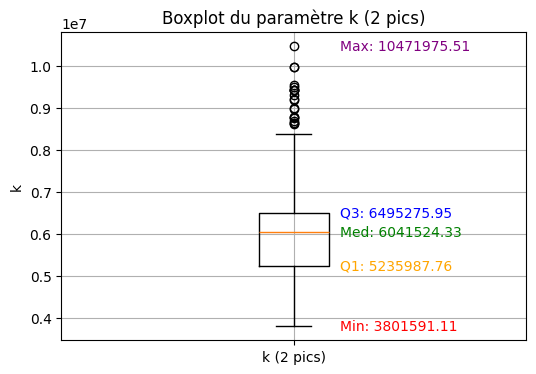

In [30]:
filtered = dataset[dataset['nombre_de_pics_5000'] == 2]

for col in ['w', 'DC', 'pitch', 'k']:
    data = filtered[col]
    stats = {
        'min': data.min(),
        'Q1': data.quantile(0.25),
        'median': data.median(),
        'Q3': data.quantile(0.75),
        'max': data.max()
    }
    plt.figure(figsize=(6, 4))
    plt.boxplot([data], labels=[f"{col} (2 pics)"])
    plt.title(f"Boxplot du paramètre {col} (2 pics)")
    plt.ylabel(col)
    plt.grid(True)
    # Affichage des valeurs numériques sur le graphique
    plt.text(1.1, stats['min'], f"Min: {stats['min']:.2f}", color='red', va='center')
    plt.text(1.1, stats['Q1'], f"Q1: {stats['Q1']:.2f}", color='orange', va='center')
    plt.text(1.1, stats['median'], f"Med: {stats['median']:.2f}", color='green', va='center')
    plt.text(1.1, stats['Q3'], f"Q3: {stats['Q3']:.2f}", color='blue', va='center')
    plt.text(1.1, stats['max'], f"Max: {stats['max']:.2f}", color='purple', va='center')
    plt.show()